# Linear Regression

## Iris dataset  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [2]:
from sklearn import datasets 
iris = datasets.load_iris() 
# iris

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
type(iris)

sklearn.utils.Bunch

In [5]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

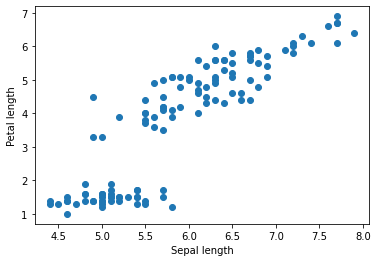

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [18]:
from sklearn.linear_model import LinearRegression 
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Train Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))
print("Test Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Train Score : 0.764
Test Score : 0.727


In [9]:
print(linr.coef_, linr.intercept_)

[1.8699969] -7.233315234253802


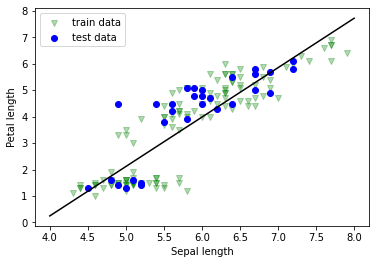

In [11]:
plt.scatter(X_train, y_train, marker='v', c='g', alpha=0.3) 
plt.scatter(X_test, y_test, marker='o', c='b') 
plt.legend(['train data', 'test data'])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

xx = np.linspace(4, 8, 3)
plt.plot(xx, linr.coef_ * xx + linr.intercept_, "k-")

In [19]:
X.shape

(150,)

## KFold() Cross Validation 

In [20]:
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator.
score = cross_val_score(LinearRegression(), X.reshape(-1,1), y, cv=cv)

print(score.round(2))
print(score.mean().round(2))

[0.72 0.73 0.83 0.68 0.72]
0.73


In [ ]:
## what is cv?
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [ ]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    # X_train, X_test = X[train_index], X[test_index]
    # y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   1   3   4   5   7   9  10  11  12  13  16  18  19  20  22  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  39  40  41  42  43  44
  46  47  48  49  50  51  52  53  54  57  58  60  62  63  64  65  66  68
  69  70  71  72  73  74  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 102 104 105 106 108
 109 110 112 113 114 115 116 117 118 119 121 123 124 125 128 129 130 132
 133 135 136 137 138 140 142 143 144 145 146 149] 
 TEST:
 [  2   6   8  14  15  17  21  23  38  45  55  56  59  61  67  75 101 103
 107 111 120 122 126 127 131 134 139 141 147 148]
TRAIN:
 [  0   2   3   5   6   7   8   9  12  14  15  17  19  21  23  24  25  27
  28  29  30  31  32  33  35  37  38  39  40  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  66  67
  68  70  72  73  74  75  76  78  79  80  81  83  84  86  87  88  89  91
  92  93  94  96  97  98  99 100 101 102 103 106 107 108 109 111 112 113

In [21]:
## using decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train) 
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.6488706514700406


## 몸무게 예측

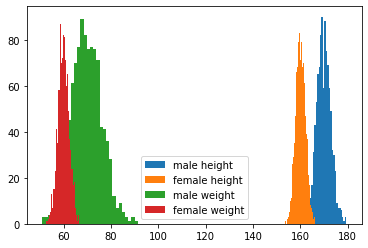

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples)   # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.legend(['male height','female height','male weight','female weight'])
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.98793027]
0.9150805060374462


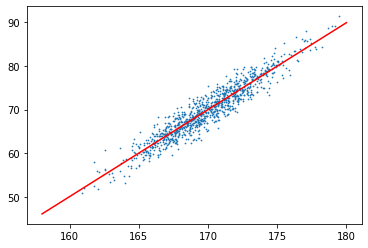

In [24]:
xs = np.linspace(158, 180, 100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.02111101] -103.39022317609067
0.790010140436467


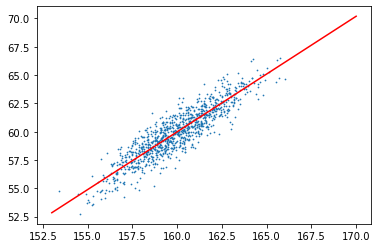

In [26]:
xs = np.linspace(153,170,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [27]:
# put together
x = np.concatenate((x1, x2))   # height
y = np.concatenate((y1, y2))   # weight

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.14970427] -124.70248363358914
0.8526309477784737


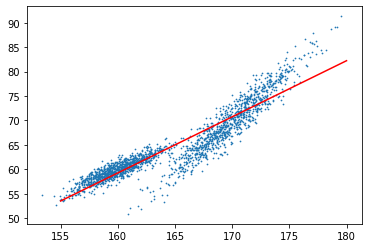

In [28]:
xs = np.linspace(155,180,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

- Now, we will add another feature (sex)

In [29]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)  # 기존 인덱스 무시

In [30]:
X.tail()

,height,sex
1995,162.042752,1
1996,155.979929,1
1997,161.024710,1
1998,161.489400,1
1999,161.150035,1


In [31]:
y[-5:]

array([61.50136494, 54.14850584, 61.11123321, 60.76799984, 62.69339813])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_, leg.intercept_)
print(leg.score(X_test, y_test))

[1.66750568 6.67042949] -213.47640613870124
0.9195246291002721


In [ ]:
## 위의 결과는 1.67*zl + 6.8*성별 - 215.43 의 선형 모델 구성
## score 는 91.86 % 로 향상
## 성별은 0(남성), 1(여성)

In [33]:
X_train[:10]

,height,sex
1115,157.120045,1
691,169.579234,0
1177,157.001549,1
1424,157.596150,1
1954,160.154421,1
1791,159.386990,1
664,166.101949,0
1566,158.697361,1
1058,159.316190,1
1689,160.611833,1


In [ ]:
# K-Fold Cross validation (교차겸증)
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
X.shape

(2000, 2)

In [34]:
cv = KFold(n_splits=5, shuffle=True) # Whether to shuffle the data before 
                                      # splitting into batches.
score = cross_val_score(leg, X, y, cv=cv)
score, score.mean()

(array([0.90951709, 0.91746796, 0.90511194, 0.92725773, 0.9175903 ]),
 0.9153890021187874)

In [35]:
# decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print("Train score: {}".format(dec_reg.score(X_train, y_train)))
print("Test score: {}".format(dec_reg.score(X_test, y_test)))

Train score: 0.999982213104046
Test score: 0.8951352227535995


In [ ]:
X_train[:5]

,height,sex
766,168.690085,0
1532,160.492153,1
357,166.202626,0
464,167.643134,0
1486,160.637677,1


In [ ]:
y_train[:5]

array([64.20663834, 61.08815827, 62.75644047, 64.92203801, 58.8369276 ])